In [8]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
data = pd.read_csv("C:/prodigy/train (1).csv")

In [12]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

In [13]:
X = data[features]
y = data[target]

In [15]:
X.loc[:, :] = X.fillna(X.median())

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2806426667.247853
R^2 Score: 0.6341189942328371


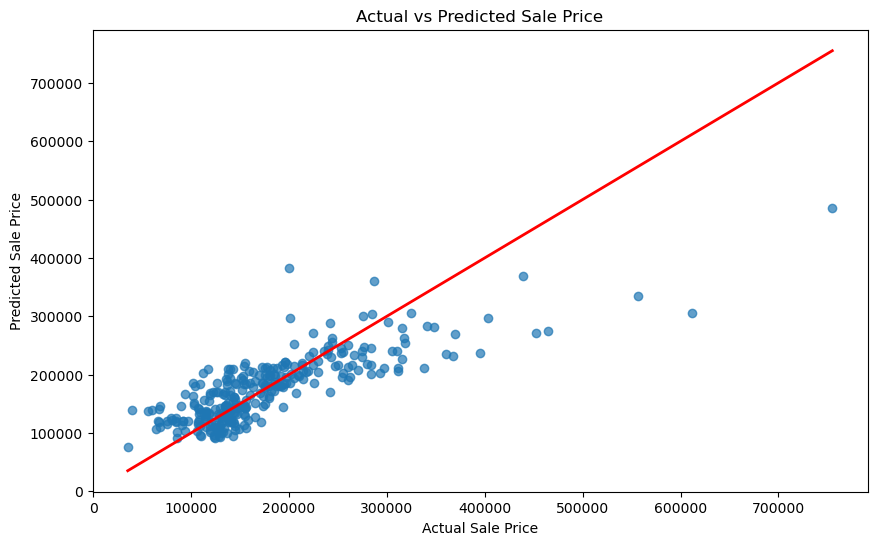

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()

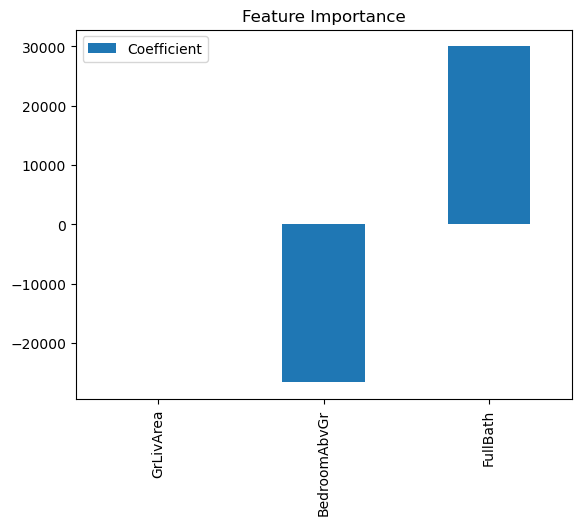

In [22]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.plot(kind='bar')
plt.title('Feature Importance')
plt.show()
